In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/COMPFEST 12/DSA Compfest/Camp 2/project/default_sample.csv')
df.head()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,ctrl,debt_to_income,debt_to_income_moral,default,delinquent,female,followup_exp,income,late_2016,main_exp,male,male_moral,min_payment,moral_all,moral_first,moral_imp,moral_non,moral_rel,moral_repeated,muslim,muslim_moral,old,old_moral,outstanding,p_usage_next1month,poor_credit_history,poor_credit_history_moral,province,province_name,randomcardnumber,religious_plac,repaid_twice_min,sample_before,savings_15,savings_18,savings_account,savings_reduced,simple_rem,simple_rem_plus_due_date_message,time_lag_first_moral,treatment,treatment_repeated,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,type_obs,wave,default_sample,ctrl_extra_weight,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
0,40.250000,484000,0,0,NaN,1,0,2.0,10.0,0,0,NaN,NaN,0,0,1,0,60.0,0,1,NaN,NaN,484000,0,0,0,0,0,0,1,NaN,NaN,NaN,4.84000,0,1,NaN,1,Aceh,28164000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,credit_rep,NaN,credit_rep,NaN,NaN,NaN,NaN,NaN,Treated,1,1,NaN,1.0,0.054791,0,1,1,NaN,1,0,0,0
1,56.000000,0,0,0,NaN,0,0,NaN,10.0,0,1,1.0,0.0,1,1,0,0,60.0,0,1,1.0,0.0,575600,0,0,0,0,0,0,1,0.0,1.0,0.0,5.75600,0,1,0.0,1,Aceh,433074000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,ctrl,NaN,ctrl,NaN,NaN,NaN,NaN,NaN,Control,1,1,NaN,1.0,0.077450,0,1,1,0.0,1,1,0,0
2,26.333334,0,1745370,0,NaN,0,0,NaN,10.0,0,0,0.0,0.0,0,1,0,0,60.0,0,1,1.0,1.0,247400,1,1,0,0,1,0,1,1.0,0.0,0.0,2.47400,1,0,0.0,1,Aceh,184692000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,moral_rel,NaN,NaN,moral_rel,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.058166,0,1,1,1.0,1,0,0,0
3,32.333332,1410000,1040000,0,NaN,0,0,NaN,10.0,0,0,1.0,1.0,0,0,1,0,60.0,0,1,0.0,0.0,1407956,1,1,0,0,1,0,1,1.0,0.0,0.0,14.07956,1,1,1.0,1,Aceh,393092000075,0,0,0,NaN,NaN,0,NaN,0,0,NaN,moral_rel,NaN,NaN,moral_rel,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.061453,0,1,1,1.0,1,0,0,0
4,41.000000,600000,0,0,NaN,1,0,2.0,10.0,0,0,NaN,NaN,0,0,0,0,60.0,0,1,NaN,NaN,257600,0,0,0,0,0,0,1,NaN,NaN,NaN,2.57600,0,0,NaN,1,Aceh,250955000075,0,1,0,NaN,NaN,0,NaN,0,0,NaN,credit_rep,NaN,NaN,credit_rep,NaN,NaN,NaN,NaN,Treated,2,1,NaN,1.0,0.056379,0,1,1,NaN,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   int64  
 2   amount_spent_next1month           6979 non-null   int64  
 3   cash_rebate                       6979 non-null   int64  
 4   cash_rebate_amount                0 non-null      float64
 5   credit_rep                        6979 non-null   int64  
 6   credit_rep_plus_moral_rel         6979 non-null   int64  
 7   credit_rep_version                2000 non-null   float64
 8   creditlimit                       6979 non-null   float64
 9   crowding_out_exp                  6979 non-null   int64  
 10  ctrl                              6979 non-null   int64  
 11  debt_to_income                    2979 non-null   float64
 12  debt_t

# 0. Exploring Data

In [5]:
nominal_features= []
for i in df.columns:
    if df[i].nunique() < 10:
        nominal_features.append(i)
    else:
        pass
nominal_features

['cash_rebate',
 'cash_rebate_amount',
 'credit_rep',
 'credit_rep_plus_moral_rel',
 'credit_rep_version',
 'crowding_out_exp',
 'ctrl',
 'debt_to_income',
 'debt_to_income_moral',
 'default',
 'delinquent',
 'female',
 'followup_exp',
 'late_2016',
 'main_exp',
 'male',
 'male_moral',
 'moral_all',
 'moral_first',
 'moral_imp',
 'moral_non',
 'moral_rel',
 'moral_repeated',
 'muslim',
 'muslim_moral',
 'old',
 'old_moral',
 'p_usage_next1month',
 'poor_credit_history',
 'poor_credit_history_moral',
 'religious_plac',
 'repaid_twice_min',
 'sample_before',
 'savings_account',
 'savings_reduced',
 'simple_rem',
 'simple_rem_plus_due_date_message',
 'time_lag_first_moral',
 'treatment',
 'treatment_repeated',
 'treatment_wave1',
 'treatment_wave2',
 'treatment_wave3',
 'treatment_wave4',
 'treatment_wave5',
 'treatment_wave6',
 'type_obs',
 'wave',
 'default_sample',
 'ctrl_extra_weight',
 'weight',
 'high_credit_risk',
 'low_credit_risk',
 'religious_province',
 'religious_province_mora

In [6]:
df['cash_rebate'].value_counts()

0    6979
Name: cash_rebate, dtype: int64

In [7]:
df['credit_rep'].value_counts()

0    4979
1    2000
Name: credit_rep, dtype: int64

In [8]:
df['credit_rep_plus_moral_rel'].value_counts()

0    6979
Name: credit_rep_plus_moral_rel, dtype: int64

In [9]:
df['credit_rep_version'].value_counts()

1.0    1000
2.0    1000
Name: credit_rep_version, dtype: int64

In [10]:
df['crowding_out_exp'].value_counts()

0    6979
Name: crowding_out_exp, dtype: int64

In [11]:
df['ctrl'].value_counts()

0    5000
1    1979
Name: ctrl, dtype: int64

In [12]:
df['debt_to_income'].value_counts()

0.0    1547
1.0    1432
Name: debt_to_income, dtype: int64

In [13]:
df['debt_to_income_moral'].value_counts()

0.0    2483
1.0     496
Name: debt_to_income_moral, dtype: int64

In [14]:
df['prediction'].value_counts()

0.019676    3
0.045878    3
0.052070    3
0.044660    3
0.041955    3
           ..
0.016542    1
0.099323    1
0.006228    1
0.075613    1
0.017382    1
Name: prediction, Length: 6870, dtype: int64

In [15]:
risk_cols = ['prediction', 'high_credit_risk']
risk_group = df[risk_cols].groupby('high_credit_risk').agg(['min', 'max'])
risk_group.head()

prediction          
                        min       max
high_credit_risk                     
0                 -0.052320  0.099808
1                  0.099909  0.536855

In [16]:
df['religious_province'].value_counts()

0    4353
1    2626
Name: religious_province, dtype: int64

In [17]:
prov_cols = ['religious_province','province']
prov_group = df[prov_cols].groupby(prov_cols).agg('count')
prov_group

Empty DataFrame
Columns: []
Index: [(0, 2), (0, 3), (0, 4), (0, 6), (0, 8), (0, 9), (0, 12), (0, 14), (0, 15), (0, 16), (0, 18), (0, 19), (0, 20), (0, 23), (0, 24), (0, 26), (0, 27), (1, 1), (1, 5), (1, 7), (1, 10), (1, 11), (1, 13), (1, 17), (1, 21), (1, 22), (1, 25), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34)]

In [18]:
df['p_usage_next1month'].value_counts()

0    4027
1    2952
Name: p_usage_next1month, dtype: int64

In [19]:
df['delinquent'].value_counts()

1    4337
0    2642
Name: delinquent, dtype: int64

In [20]:
df['default'].value_counts()

0    6544
1     435
Name: default, dtype: int64

In [21]:
df['late_2016'].value_counts()

0    5332
1    1647
Name: late_2016, dtype: int64

In [22]:
# cash rebate = 2.75% × (credit limit - amount outstanding
cash_rebate_2 = 2.75/100* (df['creditlimit']-df['outstanding'])
cash_rebate_1 = df['cash_rebate']
cash_rebate_2 == cash_rebate_1
print(cash_rebate_2)
print(cash_rebate_1)

0       0.141900
1       0.116710
2       0.206965
3      -0.112188
4       0.204160
          ...   
6974    0.157713
6975    0.212630
6976    0.013585
6977   -0.063029
6978    0.100980
Length: 6979, dtype: float64
0       0
1       0
2       0
3       0
4       0
       ..
6974    0
6975    0
6976    0
6977    0
6978    0
Name: cash_rebate, Length: 6979, dtype: int64


In [23]:
df['savings_15'].value_counts()

0.0          37
400317.0      6
20000.0       3
400282.0      3
411232.0      3
             ..
204116.0      1
416420.0      1
15829.0       1
5024100.0     1
514053.0      1
Name: savings_15, Length: 847, dtype: int64

# 1. Cleansing and Preprocessing


##1.1. Dropping relatively empty columns (>90% is null)

In [24]:
treatment_cols = [i for i in df.columns if i.split('_')[0] == 'treatment']
empty_cols = [i for i in df.columns if (df[i].isnull().sum() > (0.9*len(df))) and (i not in treatment_cols)]
print(treatment_cols)
print(empty_cols)

['treatment', 'treatment_repeated', 'treatment_wave1', 'treatment_wave2', 'treatment_wave3', 'treatment_wave4', 'treatment_wave5', 'treatment_wave6']
['cash_rebate_amount', 'time_lag_first_moral', 'ctrl_extra_weight']


In [25]:
df = df.drop(columns=empty_cols, axis=1)

##1.2. Filling NaN

In [26]:
num = ['int', 'float']
num_features = [i for i in df.columns if df[i].dtype in num]
cat_features = [i for i in df.columns if i not in num_features]
cat_features

['province_name',
 'treatment',
 'treatment_wave1',
 'treatment_wave2',
 'treatment_wave3',
 'treatment_wave4',
 'treatment_wave5',
 'treatment_wave6',
 'type_obs']

In [27]:
df_num = df[num_features].fillna(0)
df_cat = df[cat_features].fillna('No Data')
df_filled = df_num.join(df_cat)
df_filled.head()

,age,amount_repaid,amount_spent_next1month,cash_rebate,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,ctrl,debt_to_income,debt_to_income_moral,default,delinquent,female,followup_exp,income,late_2016,main_exp,male,male_moral,min_payment,moral_all,moral_first,moral_imp,moral_non,moral_rel,moral_repeated,muslim,muslim_moral,old,old_moral,outstanding,p_usage_next1month,poor_credit_history,poor_credit_history_moral,province,randomcardnumber,religious_plac,repaid_twice_min,sample_before,savings_15,savings_18,savings_account,savings_reduced,simple_rem,simple_rem_plus_due_date_message,treatment_repeated,wave,default_sample,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95,province_name,treatment,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,type_obs
0,40.250000,484000,0,0,1,0,2.0,10.0,0,0,0.0,0.0,0,0,1,0,60.0,0,1,0.0,0.0,484000,0,0,0,0,0,0,1,0.0,0.0,0.0,4.84000,0,1,0.0,1,28164000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,1,1,1.0,0.054791,0,1,1,0.0,1,0,0,0,Aceh,credit_rep,credit_rep,No Data,No Data,No Data,No Data,No Data,Treated
1,56.000000,0,0,0,0,0,0.0,10.0,0,1,1.0,0.0,1,1,0,0,60.0,0,1,1.0,0.0,575600,0,0,0,0,0,0,1,0.0,1.0,0.0,5.75600,0,1,0.0,1,433074000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,1,1,1.0,0.077450,0,1,1,0.0,1,1,0,0,Aceh,ctrl,ctrl,No Data,No Data,No Data,No Data,No Data,Control
2,26.333334,0,1745370,0,0,0,0.0,10.0,0,0,0.0,0.0,0,1,0,0,60.0,0,1,1.0,1.0,247400,1,1,0,0,1,0,1,1.0,0.0,0.0,2.47400,1,0,0.0,1,184692000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,2,1,1.0,0.058166,0,1,1,1.0,1,0,0,0,Aceh,moral_rel,No Data,moral_rel,No Data,No Data,No Data,No Data,Treated
3,32.333332,1410000,1040000,0,0,0,0.0,10.0,0,0,1.0,1.0,0,0,1,0,60.0,0,1,0.0,0.0,1407956,1,1,0,0,1,0,1,1.0,0.0,0.0,14.07956,1,1,1.0,1,393092000075,0,0,0,0.0,0.0,0,0.0,0,0,0.0,2,1,1.0,0.061453,0,1,1,1.0,1,0,0,0,Aceh,moral_rel,No Data,moral_rel,No Data,No Data,No Data,No Data,Treated
4,41.000000,600000,0,0,1,0,2.0,10.0,0,0,0.0,0.0,0,0,0,0,60.0,0,1,0.0,0.0,257600,0,0,0,0,0,0,1,0.0,0.0,0.0,2.57600,0,0,0.0,1,250955000075,0,1,0,0.0,0.0,0,0.0,0,0,0.0,2,1,1.0,0.056379,0,1,1,0.0,1,0,0,0,Aceh,credit_rep,No Data,credit_rep,No Data,No Data,No Data,No Data,Treated


##1.2. Dropping columns that can be represented by another columns

###1.2.1 female -> male

In [28]:
df = df_filled.copy()
df['female'].value_counts()

0    4225
1    2754
Name: female, dtype: int64

In [29]:
df['male'].value_counts()

0.0    5164
1.0    1815
Name: male, dtype: int64

In [30]:
# DROP IF SO

### 1.2.2 age -> old

In [31]:
old_cols = ['old', 'age']
old_group = df[old_cols].groupby('old').agg(['min', 'max'])
old_group.head()

age           
           min        max
old                      
0.0  22.166666  91.666664
1.0  41.166664  71.666672

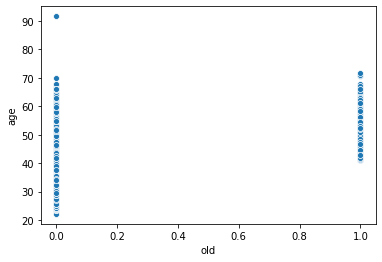

In [32]:
# DROP IF SO
sns.scatterplot(x=df['old'], y=df['age'])

###1.2.3 high_credit_risk_75 or 90 or 95 -> 50

In [33]:
high_credit_risk_rank_cols = [i for i in df.columns if i.split('_')[0] == 'high' and (i != 'high_credit_risk')]
high_credit_risk_rank_cols

['high_credit_risk_50',
 'high_credit_risk_75',
 'high_credit_risk_90',
 'high_credit_risk_95']

In [34]:
df = df.drop(columns=high_credit_risk_rank_cols[1:])

###1.2.4 low_credit_risk -> high_credit_risk

In [35]:
df['low_credit_risk'].value_counts()

1    6262
0     717
Name: low_credit_risk, dtype: int64

In [36]:
df['high_credit_risk'].value_counts()

0    6262
1     717
Name: high_credit_risk, dtype: int64

In [37]:
df = df.drop(columns='low_credit_risk')

###1.2.5 wave -> treatment_waveN

In [38]:
df['wave'].value_counts()

2    2683
1    2476
3    1820
Name: wave, dtype: int64

In [39]:
df['treatment_wave1'].value_counts()

No Data           4201
credit_rep         800
ctrl               778
religious_plac     400
simple_rem         400
moral_rel          400
Name: treatment_wave1, dtype: int64

In [40]:
df['treatment_wave2'].value_counts()

No Data           4052
ctrl               927
credit_rep         800
religious_plac     400
simple_rem         400
moral_rel          400
Name: treatment_wave2, dtype: int64

In [41]:
df['treatment_wave3'].value_counts()

No Data           5016
ctrl               963
credit_rep         400
religious_plac     200
simple_rem         200
moral_rel          200
Name: treatment_wave3, dtype: int64

In [42]:
# DROP IF SO
#df = df.drop(columns='wave')

###1.2.6 province_name -> province

In [43]:
df['province'].nunique()

34

In [44]:
df['province_name'].nunique()

34

In [45]:
df = df.drop(columns='province_name')

### 1.2.7 treatment -> moral or another incentives

In [46]:
df['treatment'].value_counts()

credit_rep        2000
ctrl              1979
religious_plac    1000
simple_rem        1000
moral_rel         1000
Name: treatment, dtype: int64

In [47]:
df['moral_rel'].value_counts()

0    5979
1    1000
Name: moral_rel, dtype: int64

In [48]:
df['moral_imp'].value_counts()

0    6979
Name: moral_imp, dtype: int64

In [49]:
df['moral_non'].value_counts()

0    6979
Name: moral_non, dtype: int64

In [50]:
df['cash_rebate'].value_counts()

0    6979
Name: cash_rebate, dtype: int64

In [51]:
df['credit_rep'].value_counts()

0    4979
1    2000
Name: credit_rep, dtype: int64

In [52]:
df['religious_plac'].value_counts()

0    5979
1    1000
Name: religious_plac, dtype: int64

In [53]:
df['simple_rem'].value_counts()

0    5979
1    1000
Name: simple_rem, dtype: int64

In [54]:
df = df.drop(columns='treatment')

###1.2.8 type_obs -> ctrl

In [55]:
df['ctrl'].value_counts()

0    5000
1    1979
Name: ctrl, dtype: int64

In [56]:
df['type_obs'].value_counts()

Treated    5000
Control    1979
Name: type_obs, dtype: int64

In [57]:
df = df.drop(columns='type_obs')

###1.2.9 prediction -> high credit risk

In [58]:
risk_cols = ['prediction', 'high_credit_risk']
risk_group = df[risk_cols].groupby('high_credit_risk').agg(['min', 'max'])
risk_group.head()

prediction          
                        min       max
high_credit_risk                     
0                 -0.052320  0.099808
1                  0.099909  0.536855

In [59]:
df = df.drop(columns='prediction')

###1.2.10 province -> religious province

In [60]:
prov_cols = ['religious_province','province']
prov_group = df[prov_cols].groupby(prov_cols).agg('count')
prov_group

Empty DataFrame
Columns: []
Index: [(0, 2), (0, 3), (0, 4), (0, 6), (0, 8), (0, 9), (0, 12), (0, 14), (0, 15), (0, 16), (0, 18), (0, 19), (0, 20), (0, 23), (0, 24), (0, 26), (0, 27), (1, 1), (1, 5), (1, 7), (1, 10), (1, 11), (1, 13), (1, 17), (1, 21), (1, 22), (1, 25), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34)]

In [61]:
df = df.drop(columns='province')

In [62]:
df.columns

Index(['age', 'amount_repaid', 'amount_spent_next1month', 'cash_rebate',
       'credit_rep', 'credit_rep_plus_moral_rel', 'credit_rep_version',
       'creditlimit', 'crowding_out_exp', 'ctrl', 'debt_to_income',
       'debt_to_income_moral', 'default', 'delinquent', 'female',
       'followup_exp', 'income', 'late_2016', 'main_exp', 'male', 'male_moral',
       'min_payment', 'moral_all', 'moral_first', 'moral_imp', 'moral_non',
       'moral_rel', 'moral_repeated', 'muslim', 'muslim_moral', 'old',
       'old_moral', 'outstanding', 'p_usage_next1month', 'poor_credit_history',
       'poor_credit_history_moral', 'randomcardnumber', 'religious_plac',
       'repaid_twice_min', 'sample_before', 'savings_15', 'savings_18',
       'savings_account', 'savings_reduced', 'simple_rem',
       'simple_rem_plus_due_date_message', 'treatment_repeated', 'wave',
       'default_sample', 'weight', 'high_credit_risk', 'religious_province',
       'religious_province_moral', 'high_credit_risk_50', '

##1.3 Encoding Categorical Columns

In [63]:
num = ['int', 'float']
num_features = [i for i in df.columns if df[i].dtype in num]
cat_features = [i for i in df.columns if i not in num_features]
cat_features

['treatment_wave1',
 'treatment_wave2',
 'treatment_wave3',
 'treatment_wave4',
 'treatment_wave5',
 'treatment_wave6']

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto').fit(df[cat_features])
transformed_data = encoder.transform(df[cat_features]).toarray()
transformed_data.shape

(6979, 28)

In [65]:
transformed_data = pd.DataFrame(transformed_data,columns=encoder.get_feature_names(cat_features))
transformed_data.head()

,treatment_wave1_No Data,treatment_wave1_credit_rep,treatment_wave1_ctrl,treatment_wave1_moral_rel,treatment_wave1_religious_plac,treatment_wave1_simple_rem,treatment_wave2_No Data,treatment_wave2_credit_rep,treatment_wave2_ctrl,treatment_wave2_moral_rel,treatment_wave2_religious_plac,treatment_wave2_simple_rem,treatment_wave3_No Data,treatment_wave3_credit_rep,treatment_wave3_ctrl,treatment_wave3_moral_rel,treatment_wave3_religious_plac,treatment_wave3_simple_rem,treatment_wave4_No Data,treatment_wave4_ctrl,treatment_wave5_No Data,treatment_wave5_ctrl,treatment_wave5_moral_imp,treatment_wave5_moral_non,treatment_wave5_moral_rel,treatment_wave6_No Data,treatment_wave6_ctrl,treatment_wave6_moral_rel
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
df = df.join(transformed_data)
df.iloc[:,-36:].head()

,religious_province_moral,high_credit_risk_50,treatment_wave1,treatment_wave2,treatment_wave3,treatment_wave4,treatment_wave5,treatment_wave6,treatment_wave1_No Data,treatment_wave1_credit_rep,treatment_wave1_ctrl,treatment_wave1_moral_rel,treatment_wave1_religious_plac,treatment_wave1_simple_rem,treatment_wave2_No Data,treatment_wave2_credit_rep,treatment_wave2_ctrl,treatment_wave2_moral_rel,treatment_wave2_religious_plac,treatment_wave2_simple_rem,treatment_wave3_No Data,treatment_wave3_credit_rep,treatment_wave3_ctrl,treatment_wave3_moral_rel,treatment_wave3_religious_plac,treatment_wave3_simple_rem,treatment_wave4_No Data,treatment_wave4_ctrl,treatment_wave5_No Data,treatment_wave5_ctrl,treatment_wave5_moral_imp,treatment_wave5_moral_non,treatment_wave5_moral_rel,treatment_wave6_No Data,treatment_wave6_ctrl,treatment_wave6_moral_rel
0,0.0,1,credit_rep,No Data,No Data,No Data,No Data,No Data,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1,ctrl,No Data,No Data,No Data,No Data,No Data,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1,No Data,moral_rel,No Data,No Data,No Data,No Data,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1,No Data,moral_rel,No Data,No Data,No Data,No Data,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1,No Data,credit_rep,No Data,No Data,No Data,No Data,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
df.columns

Index(['age', 'amount_repaid', 'amount_spent_next1month', 'cash_rebate',
       'credit_rep', 'credit_rep_plus_moral_rel', 'credit_rep_version',
       'creditlimit', 'crowding_out_exp', 'ctrl', 'debt_to_income',
       'debt_to_income_moral', 'default', 'delinquent', 'female',
       'followup_exp', 'income', 'late_2016', 'main_exp', 'male', 'male_moral',
       'min_payment', 'moral_all', 'moral_first', 'moral_imp', 'moral_non',
       'moral_rel', 'moral_repeated', 'muslim', 'muslim_moral', 'old',
       'old_moral', 'outstanding', 'p_usage_next1month', 'poor_credit_history',
       'poor_credit_history_moral', 'randomcardnumber', 'religious_plac',
       'repaid_twice_min', 'sample_before', 'savings_15', 'savings_18',
       'savings_account', 'savings_reduced', 'simple_rem',
       'simple_rem_plus_due_date_message', 'treatment_repeated', 'wave',
       'default_sample', 'weight', 'high_credit_risk', 'religious_province',
       'religious_province_moral', 'high_credit_risk_50', '

In [68]:
df = df.drop(columns=cat_features)

In [69]:
no_data_treat_feat = [i for i in df.columns if i.split('_')[-1] == 'No Data']
no_data_treat_feat

['treatment_wave1_No Data',
 'treatment_wave2_No Data',
 'treatment_wave3_No Data',
 'treatment_wave4_No Data',
 'treatment_wave5_No Data',
 'treatment_wave6_No Data']

In [70]:
df = df.drop(columns=no_data_treat_feat)

In [71]:
cat_features_2 = [i for i in df.columns if i not in num_features]
df[cat_features_2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   treatment_wave1_credit_rep      6979 non-null   float64
 1   treatment_wave1_ctrl            6979 non-null   float64
 2   treatment_wave1_moral_rel       6979 non-null   float64
 3   treatment_wave1_religious_plac  6979 non-null   float64
 4   treatment_wave1_simple_rem      6979 non-null   float64
 5   treatment_wave2_credit_rep      6979 non-null   float64
 6   treatment_wave2_ctrl            6979 non-null   float64
 7   treatment_wave2_moral_rel       6979 non-null   float64
 8   treatment_wave2_religious_plac  6979 non-null   float64
 9   treatment_wave2_simple_rem      6979 non-null   float64
 10  treatment_wave3_credit_rep      6979 non-null   float64
 11  treatment_wave3_ctrl            6979 non-null   float64
 12  treatment_wave3_moral_rel       69

In [72]:
df['treatment_total'] = 0    
for i in cat_features_2:
    df['treatment_total'] += df[i]
df['treatment_total'].value_counts()

1.0    5854
2.0     958
3.0     157
4.0       7
5.0       3
Name: treatment_total, dtype: int64

In [73]:
df.iloc[:,-1]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6974    1.0
6975    1.0
6976    2.0
6977    1.0
6978    2.0
Name: treatment_total, Length: 6979, dtype: float64

In [74]:
df = df.drop(columns=cat_features_2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   int64  
 2   amount_spent_next1month           6979 non-null   int64  
 3   cash_rebate                       6979 non-null   int64  
 4   credit_rep                        6979 non-null   int64  
 5   credit_rep_plus_moral_rel         6979 non-null   int64  
 6   credit_rep_version                6979 non-null   float64
 7   creditlimit                       6979 non-null   float64
 8   crowding_out_exp                  6979 non-null   int64  
 9   ctrl                              6979 non-null   int64  
 10  debt_to_income                    6979 non-null   float64
 11  debt_to_income_moral              6979 non-null   float64
 12  defaul

##1.6 Outliers

In [75]:
def outlier(kolom):
    q1 = df[kolom].quantile(0.25)
    q3 = df[kolom].quantile(0.75)
    iqr = q3-q1
    batas_atas = 2*iqr + q3
    batas_bawah = q1 - 2*iqr
    outliers = df[(df[kolom] > batas_atas) | (df[kolom] < batas_bawah)]
    if len(outliers)>0:
        print(kolom+' punya '+str(len(outliers))+' outliers'+' dari '+str(df[kolom].notna().sum())+ ' baris tidak null atau '+
           str(len(outliers)/df[kolom].notna().sum()*100)+'% dari data'  )
        print(outliers[kolom].sort_values(ascending=False).head())

nunique_more_2 = [i for i in df.columns if df[i].nunique()>5]
for n in nunique_more_2:
    outlier(n)

age punya 1 outliers dari 6979 baris tidak null atau 0.01432870038687491% dari data
6483    91.666664
Name: age, dtype: float64
amount_repaid punya 467 outliers dari 6979 baris tidak null atau 6.691503080670583% dari data
2267    40013500
6949    39506000
2427    39260000
807     39025000
3824    32830000
Name: amount_repaid, dtype: int64
amount_spent_next1month punya 664 outliers dari 6979 baris tidak null atau 9.51425705688494% dari data
3784    78747592
1490    49900000
2406    43836424
3725    41012000
2213    40632000
Name: amount_spent_next1month, dtype: int64
creditlimit punya 738 outliers dari 6979 baris tidak null atau 10.574580885513683% dari data
1089    75.0
3012    75.0
1175    75.0
1074    50.0
2009    50.0
Name: creditlimit, dtype: float64
income punya 934 outliers dari 6979 baris tidak null atau 13.383006161341166% dari data
4940    60000.0
2517    30000.0
4022    25000.0
2484     7800.0
1945     4800.0
Name: income, dtype: float64
min_payment punya 381 outliers dari 69

age                         0.294904
amount_repaid               9.389664
amount_spent_next1month     7.647188
creditlimit                 1.884824
income                     53.720554
min_payment                 3.791320
outstanding                 3.791320
savings_15                 37.151654
savings_18                 35.266628
dtype: float64


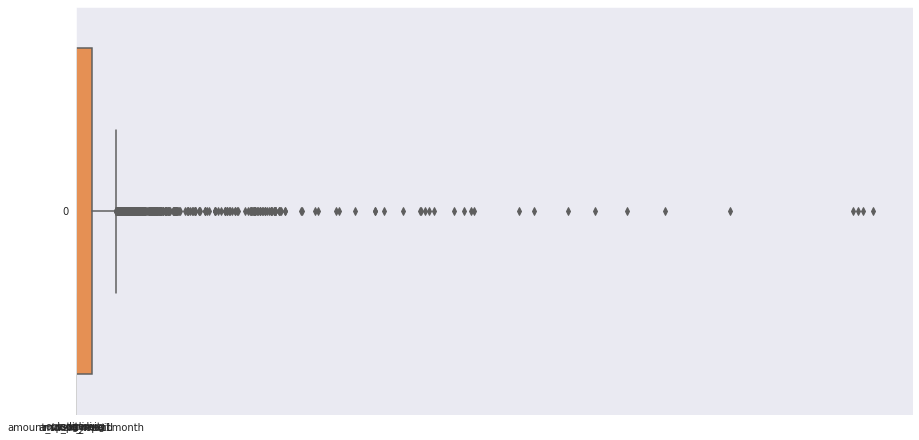

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

outlier_cols = ['age', 'amount_repaid', 'amount_spent_next1month', 'creditlimit', 'income', 'min_payment', 'outstanding', 'savings_15', 'savings_18']
plt.figure(figsize=(15,7.5))
#sns.distplot(df['age'])
print(df[outlier_cols].skew())
sns.set_style('dark')
sns.boxplot(data=df[outlier_cols[:-2]], orient="v", palette="inferno")
sns.boxplot(data=df['amount_repaid'], orient="h", palette="Oranges")

In [77]:
def outlier_handling(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_range = 2*iqr + q3
    lower_range = q1 - 2*iqr
    df.loc[(df[col] > upper_range), col] = upper_range
    df.loc[(df[col] < lower_range), col] = lower_range

for n in outlier_cols:
    outlier_handling(n)

for n in outlier_cols:
    outlier(n)

print(df[outlier_cols].skew())

age                        0.279993
amount_repaid              1.555431
amount_spent_next1month    1.426914
creditlimit                0.892855
income                     1.296738
min_payment                1.280649
outstanding                1.280649
savings_15                 0.000000
savings_18                 0.000000
dtype: float64


In [78]:
df['savings_15'].value_counts()

0.0    6979
Name: savings_15, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   float64
 2   amount_spent_next1month           6979 non-null   float64
 3   cash_rebate                       6979 non-null   int64  
 4   credit_rep                        6979 non-null   int64  
 5   credit_rep_plus_moral_rel         6979 non-null   int64  
 6   credit_rep_version                6979 non-null   float64
 7   creditlimit                       6979 non-null   float64
 8   crowding_out_exp                  6979 non-null   int64  
 9   ctrl                              6979 non-null   int64  
 10  debt_to_income                    6979 non-null   float64
 11  debt_to_income_moral              6979 non-null   float64
 12  defaul

##1.4 Dropping The Very Low Variance Columns

In [80]:
low_var_features = [i for i in df.columns if df[i].var() == 0.0] 
low_var_features

['cash_rebate',
 'credit_rep_plus_moral_rel',
 'crowding_out_exp',
 'followup_exp',
 'main_exp',
 'moral_imp',
 'moral_non',
 'moral_repeated',
 'savings_15',
 'savings_18',
 'simple_rem_plus_due_date_message',
 'treatment_repeated',
 'default_sample']

In [81]:
df = df.drop(columns=low_var_features)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6979 non-null   float64
 1   amount_repaid              6979 non-null   float64
 2   amount_spent_next1month    6979 non-null   float64
 3   credit_rep                 6979 non-null   int64  
 4   credit_rep_version         6979 non-null   float64
 5   creditlimit                6979 non-null   float64
 6   ctrl                       6979 non-null   int64  
 7   debt_to_income             6979 non-null   float64
 8   debt_to_income_moral       6979 non-null   float64
 9   default                    6979 non-null   int64  
 10  delinquent                 6979 non-null   int64  
 11  female                     6979 non-null   int64  
 12  income                     6979 non-null   float64
 13  late_2016                  6979 non-null   int64

##1.7 Imbalanced Data

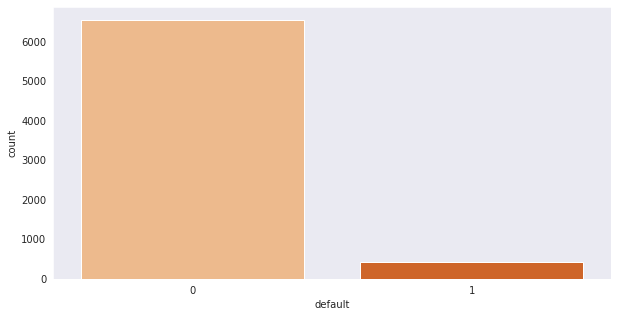

In [83]:
sns.set_style("dark")
plt.figure(figsize=(10,5))
sns.countplot(x=df['default'], palette='Oranges')

In [84]:
from sklearn.model_selection import train_test_split

# 2 PARTISI
# partitioning data into data training and data testing
train, test = train_test_split(df,test_size = .20 ,random_state = 666)

Id_col = ['randomcardnumber']
target_col = ['default']
    
##seperating dependent and independent variables on training and testing data
cols    = [i for i in df.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

###1.6.1 Using SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

# handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 69,k_neighbors=5)
train_smote_X, train_smote_Y = os.fit_sample(train_X, train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X, columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y, columns=target_col)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [86]:
train_Y["default"].value_counts()

0    5237
1     346
Name: default, dtype: int64

In [87]:
train_smote_Y["default"].value_counts()

1    5237
0    5237
Name: default, dtype: int64

#2. Modelling and Evaluation

Target kolom default, imbalance data pakainya   **AUC score** bukan lagi precision score untuk matrix perfomance. Model yang biasa digunakan logres karena sederhana dan powerful. Bisa juga metode boosting . Tuning parameter untuk logres cari. Metode imbalance data:
    - (ref1) [https://www.kaggle.com/ajay1735/my-credit-scoring-model]
    - (ref2) [https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda]
    - Cari lainnya lagi
Fitur gk perlu berkorelasi tinggi dengan target tapi bisa juga cari korelasi2 yang tinggi. Kolom korelasi tinggi buang outlier2nya baru sampling. Parameter2nya dituning lagi coba.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

##2.1 Logistic Regresion

In [134]:
LR = LogisticRegression(C=1000)
LR.fit(train_smote_X, train_smote_Y)

# Nilai AUC untuk C = [0.001,0.01,0.1,1,100,1000] sama, yaitu 0.81

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred_LR = LR.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred_LR)
roc_auc = auc(fpr, tpr)

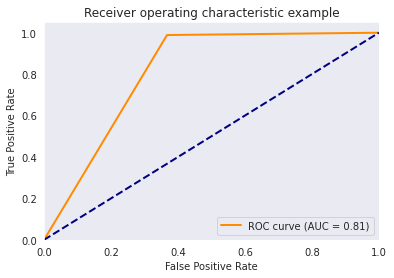

In [136]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y, y_pred_LR, labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.99      0.27        89
           0       1.00      0.63      0.77      1307

    accuracy                           0.66      1396
   macro avg       0.58      0.81      0.52      1396
weighted avg       0.94      0.66      0.74      1396



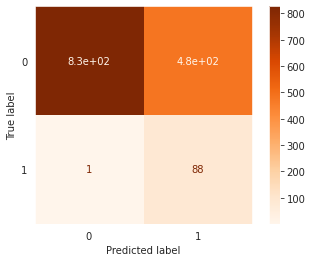

In [138]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, test_X, test_Y,  cmap=plt.cm.Oranges)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

##2.2 Random Forest

In [139]:
RF = RandomForestClassifier()
RF.fit(train_smote_X,train_smote_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

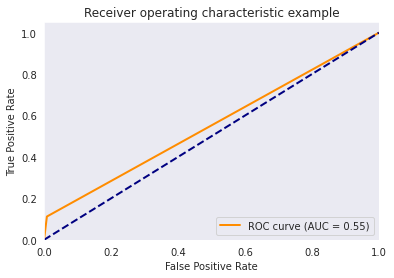

In [140]:
y_pred_RF = RF.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred_RF)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y, y_pred_RF, labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.11      0.18        89
           0       0.94      0.99      0.97      1307

    accuracy                           0.94      1396
   macro avg       0.71      0.55      0.57      1396
weighted avg       0.91      0.94      0.92      1396



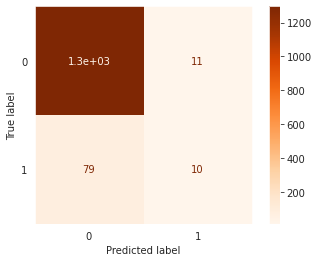

In [142]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, test_X, test_Y, cmap=plt.cm.Oranges)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

##2.3 Gradien Boosting

In [143]:
GBC = GradientBoostingClassifier()
GBC.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

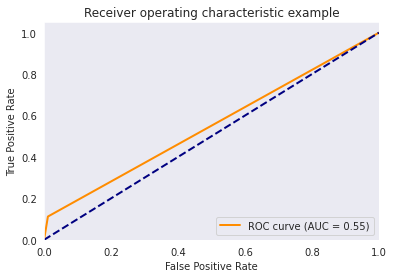

In [144]:
y_pred_GBC = GBC.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred_GBC)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred_GBC,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.11      0.18        89
           0       0.94      0.99      0.96      1307

    accuracy                           0.93      1396
   macro avg       0.67      0.55      0.57      1396
weighted avg       0.91      0.93      0.91      1396



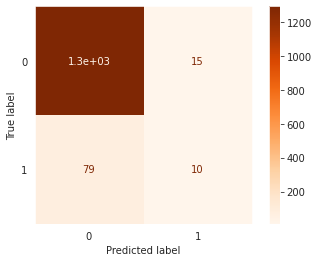

In [146]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(GBC, test_X, test_Y, cmap=plt.cm.Oranges)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

##2.4 Extreme Gradient Boosting

In [147]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

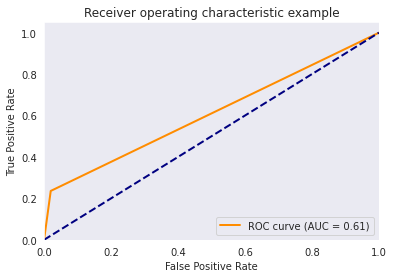

In [148]:
y_pred_XGB = XGB.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred_XGB)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred_XGB,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.24      0.31        89
           0       0.95      0.98      0.96      1307

    accuracy                           0.93      1396
   macro avg       0.70      0.61      0.64      1396
weighted avg       0.92      0.93      0.92      1396



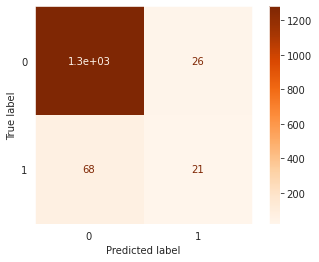

In [150]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(XGB, test_X, test_Y,  cmap=plt.cm.Oranges)  # doctest: +SKIP
plt.show() 

##2.5 Decision Tree

In [151]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

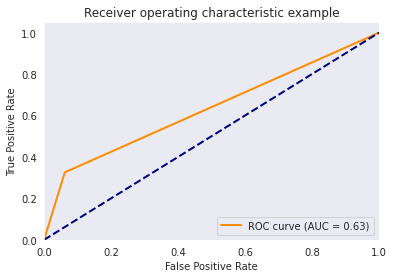

In [152]:
y_pred_DT = DT.predict(test_X)
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_Y, y_pred_DT)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = classification_report(test_Y,y_pred_DT,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.26      0.33      0.29        89
           0       0.95      0.94      0.95      1307

    accuracy                           0.90      1396
   macro avg       0.61      0.63      0.62      1396
weighted avg       0.91      0.90      0.90      1396



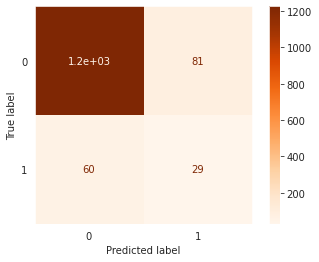

In [154]:
from sklearn.metrics import plot_confusion_matrix
heatmap = plot_confusion_matrix(DT, test_X, test_Y, cmap=plt.cm.Oranges)  # doctest: +SKIP
#sns.heatmap(heatmap, palette='Oranges')
#plt.show() 
heatmap

#3. Model Intepretability

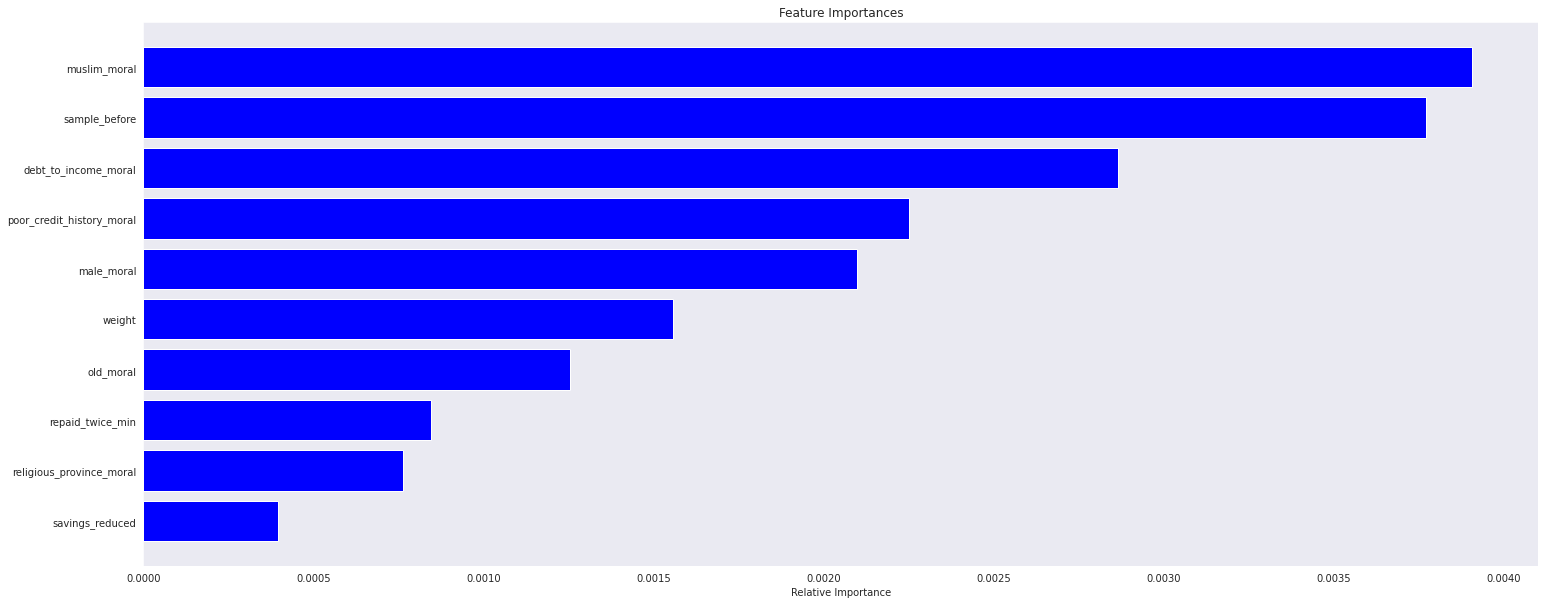

In [155]:
#feat_importances = pd.Series(RF1.feature_importances_, index=tmp_df.columns)
#feat_importances.nlargest(20).plot(kind='barh')
features = cols
plt.figure(figsize=(25,10))
importances = RF.feature_importances_
indices = np.argsort(importances)[:10]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

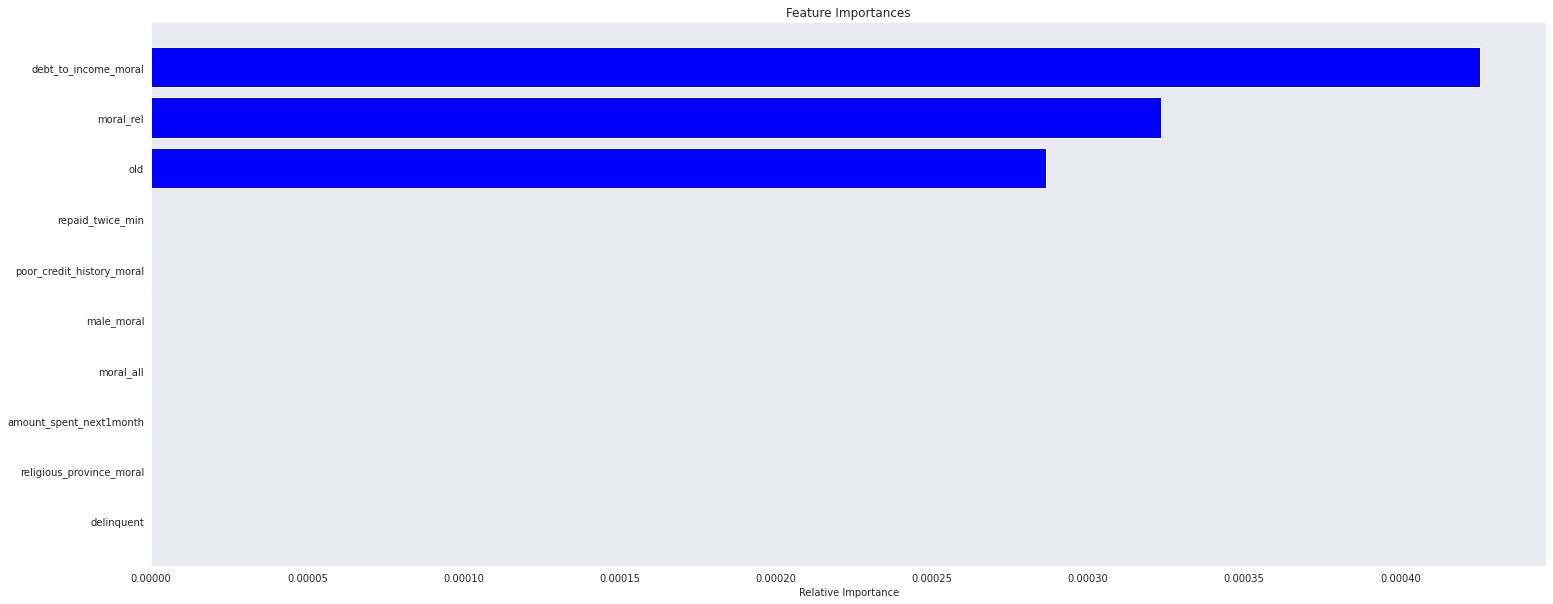

In [156]:
features = cols
plt.figure(figsize=(25,10))
importances = DT.feature_importances_
indices = np.argsort(importances)[:10]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 4. Conclusion

Relatively compared by another model, Logistic Regression performed better in classification for this case of determining default customer, although we have not maximized the AUC score to get the better one.
